# Labour Force Dataset Cleaning

In [1]:
import pandas as pd

In [2]:
lb = pd.read_csv('../data/uncleaned/labour_force.csv')
lb

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,PRT,LF,MEN,THND_PER,A,1960,2791.0000,NaN
1,PRT,LF,MEN,THND_PER,A,1974,2259.0000,NaN
2,PRT,LF,MEN,THND_PER,A,1975,2378.0000,NaN
3,PRT,LF,MEN,THND_PER,A,1976,2481.0000,NaN
4,PRT,LF,MEN,THND_PER,A,1977,2477.0000,NaN
...,...,...,...,...,...,...,...,...
33709,CRI,LF,WOMEN,THND_PER,Q,2021-Q4,971.8795,NaN
33710,CRI,LF,WOMEN,THND_PER,Q,2022-Q1,985.6447,NaN
33711,CRI,LF,WOMEN,THND_PER,Q,2022-Q2,979.6906,NaN
33712,CRI,LF,WOMEN,THND_PER,Q,2022-Q3,996.8923,NaN


**This Dataset has about 33k records for 8 features**

In [3]:
for col in lb.keys():
    lb[col]
    print(col,lb[col].isnull().values.any())

LOCATION False
INDICATOR False
SUBJECT False
MEASURE False
FREQUENCY False
TIME False
Value False
Flag Codes True


**No feature except Flag Codes has null values**

In [4]:
lb.nunique()

LOCATION         45
INDICATOR         1
SUBJECT           3
MEASURE           1
FREQUENCY         3
TIME           1158
Value         31586
Flag Codes        2
dtype: int64

In [5]:
lb['SUBJECT'].unique()

array(['MEN', 'TOT', 'WOMEN'], dtype=object)

**Subject belongs to 3 classes -> ['MEN', 'TOT', 'WOMEN'].
Since Total (TOT) consists of all the Labour Force, we drop the records with both MEN and WOMEN subjects.**

In [6]:
lb['FREQUENCY'].unique()

array(['A', 'Q', 'M'], dtype=object)

**Data is recorded for 3 frequencies -> ['A', 'Q', 'M']. We only take Annual (A) data.**

In [7]:
lb = lb[(lb['FREQUENCY']=='A')]
print(lb.shape)
lb = lb[lb['SUBJECT']=='TOT']
print(lb.shape)
# group = group.groupby(by=['location','time']).sum()

(5665, 8)
(1993, 8)


**After filtering for *Annual* occuring data and *Total* Labour Force, 1993 records are left.** 

In [8]:
lb

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1734,MEX,LF,TOT,THND_PER,A,2005,43631.500,NaN
1735,MEX,LF,TOT,THND_PER,A,2006,44982.520,NaN
1736,MEX,LF,TOT,THND_PER,A,2007,45904.540,NaN
1737,MEX,LF,TOT,THND_PER,A,2008,46769.210,NaN
1738,MEX,LF,TOT,THND_PER,A,2009,48018.360,NaN
...,...,...,...,...,...,...,...,...
33547,CRI,LF,TOT,THND_PER,A,2018,2359.644,NaN
33548,CRI,LF,TOT,THND_PER,A,2019,2464.956,NaN
33549,CRI,LF,TOT,THND_PER,A,2020,2406.532,NaN
33550,CRI,LF,TOT,THND_PER,A,2021,2440.771,NaN


In [9]:
# group.to_csv("./group.csv")

In [10]:
# group = pd.read_csv("./group.csv")
# group

In [11]:
min_year = int(lb['TIME'].min())
# int(lb['time'].min())
max_year = int(lb['TIME'].max())
sorted_cont = lb['LOCATION'].unique()
sorted_cont.sort()
for cont in sorted_cont:
    years = []
    for y in range(min_year, max_year):
#         print(lb[lb['location']==cont]['time'].astype("string"))
        if (str(y) not in lb[lb['LOCATION']==cont]['TIME'].astype("string").values):
            years.append(y)
    if len(years)!=0:
        print(cont, years)
#         print(cont,y,lb[lb['location']==cont]['time'])

AUS [1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963]
AUT [1955]
BEL [1955]
BRA [1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
CAN [1955]
CHE [1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
CHL [1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985]
COL [1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 

**Above are all the years that each country is missing the data for. It'll help us in determining the countries and years to choose for our model**

In [12]:
#Dropping superfluous columns
lb = lb.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1,errors='ignore')
lb

,LOCATION,TIME,Value
1734,MEX,2005,43631.500
1735,MEX,2006,44982.520
1736,MEX,2007,45904.540
1737,MEX,2008,46769.210
1738,MEX,2009,48018.360
...,...,...,...
33547,CRI,2018,2359.644
33548,CRI,2019,2464.956
33549,CRI,2020,2406.532
33550,CRI,2021,2440.771


{'whiskers': [<matplotlib.lines.Line2D at 0x127698910>,
 'caps': [<matplotlib.lines.Line2D at 0x127698e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x127698670>],
 'medians': [<matplotlib.lines.Line2D at 0x1276ba3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1276ba670>],
 'means': []}

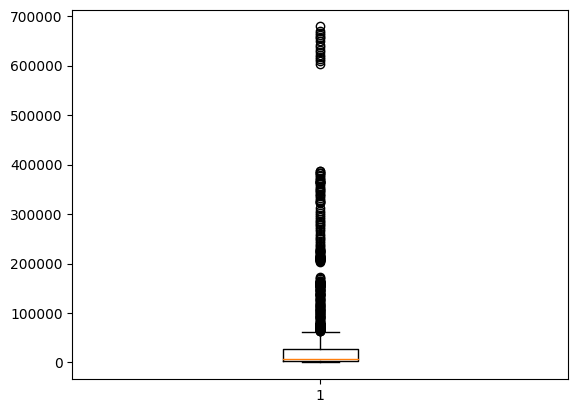

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(lb['Value'])

**We see here that a lot of data is shown as outliers, that is because the data is changing according to time and varies for countries. Becasue of temportal data in this case, we cannot remove the outliers.**

In [14]:
lb.to_csv('../data/temp/labour_force_cleaned.csv',index=False,mode='wb')

# EDA

### Statistical Measures of the feature:

In [15]:
lb.describe()

,Value
count,1993.000000
mean,36890.282020
std,83595.337607
min,0.000000
25%,2738.400000
50%,6241.667000
75%,26314.000000
max,678957.100000


### Data Types of the Columns:

In [16]:
lb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 1734 to 33551
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  1993 non-null   object 
 1   TIME      1993 non-null   object 
 2   Value     1993 non-null   float64
dtypes: float64(1), object(2)
memory usage: 62.3+ KB


### Number of rows:

In [17]:
lb.shape[0]

1993